<a href="https://colab.research.google.com/github/john-a-young/TDI/blob/master/IowaLiquorSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
import requests
!pip install sodapy 
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
from scipy.stats import chisquare
from google.colab import files


#API address for Iowa Liquor Sales: 'https://data.iowa.gov/resource/m3tr-qhgy.json'
#More info: https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

client = Socrata("data.iowa.gov", None)
results = client.get("m3tr-qhgy", limit=19000000, select='city,date')
df = pd.DataFrame.from_records(results)
#drawing a random sample to save memory 
df = df.sample(frac=0.1, random_state=1)
#putting variables into a more usable and accessible types and formats
df['date'] = df.date.astype('datetime64[ns]')
df['month'] = df['date'].dt.month_name().str.slice(stop=3)
df['day'] = df['date'].dt.day_name().str.slice(stop=3)
df['city'] = df['city'].str.lower()
#df['sale_dollars'] = df.sale_dollars.astype('float')

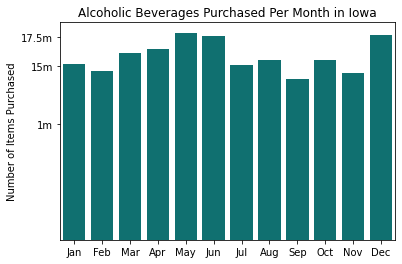

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [295]:

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = sns.countplot(x='month', data=df, order=labels, color='teal')
ax.set(xlabel='', ylabel='Number of Items Purchased', title='Alcoholic Beverages Purchased Per Month in Iowa')
ax.set_yticks([100000,150000,175000])
ax.set_yticklabels(['1m','15m', '17.5m'])
plt.show(ax)
ax.get_figure().savefig("MonthlyBeveragePurchases.png")
files.download("MonthlyBeveragePurchases.png")

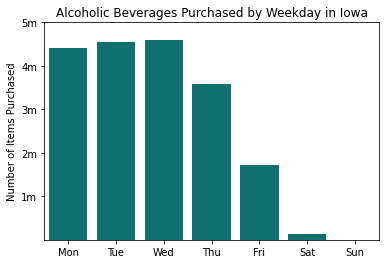

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [296]:

labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.countplot(x='day', data=df, order=labels, color='teal')
ax.set(xlabel='', ylabel='Number of Items Purchased', title='Alcoholic Beverages Purchased by Weekday in Iowa')
ax.set_yticks([100000,200000,300000,400000, 500000])
ax.set_yticklabels(['1m','2m',"3m", '4m', '5m'])
plt.show(ax)
ax.get_figure().savefig("WeeklyBeveragePurchases.png")
files.download("WeeklyBeveragePurchases.png")

In [26]:
#grab some city population data to see if this patterns vary by city size
#from https://data.iowa.gov/resource/acem-thbp.json

resultsp = client.get("acem-thbp", limit=100000,select='geographicname,year,population')


In [157]:
dfp = pd.DataFrame.from_records(resultsp)
dfp['city'] = dfp['geographicname'].str.lower()
dfp = dfp.sort_values('year', ascending=False).drop_duplicates(['city'])
dfp['population'] = dfp.population.astype('float')
top16cities = dfp.nlargest(16,'population').city
next15cities = top16cities[top16cities != "des moines"]
percentile80 = len(dfp['city'])/1.25
smallestcities = dfp.nsmallest(int(percentile80),'population').city

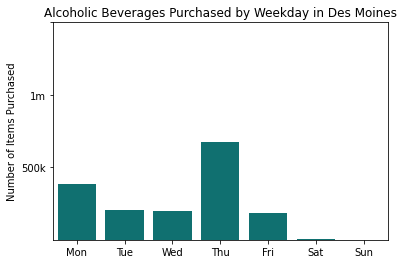

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [297]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.countplot(x='day', data=df[df['city'] == "des moines"], order=labels, color='teal')
ax.set(xlabel='', ylabel='Number of Items Purchased', title='Alcoholic Beverages Purchased by Weekday in Des Moines')
ax.set_yticks([50000,100000, 150000])
ax.set_yticklabels(['500k','1m'])
plt.show(ax)
ax.get_figure().savefig("WeeklyBeveragePurchasesDM.png")
files.download("WeeklyBeveragePurchasesDM.png")

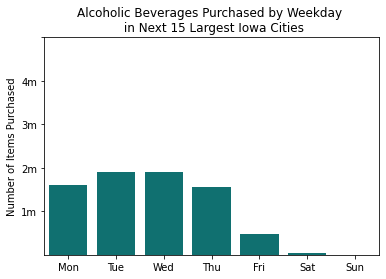

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [298]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.countplot(x='day', data=df[df['city'].isin(next15cities)], order=labels, color='teal')
ax.set(xlabel='', ylabel='Number of Items Purchased', title='Alcoholic Beverages Purchased by Weekday \n in Next 15 Largest Iowa Cities')
ax.set_yticks([100000,200000,300000,400000, 500000])
ax.set_yticklabels(['1m','2m',"3m", '4m'])
plt.show(ax)
ax.get_figure().savefig("WeeklyBeveragePurchases15Large.png")
files.download("WeeklyBeveragePurchases15Large.png")

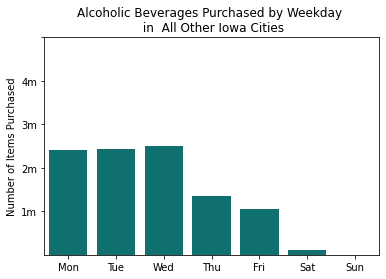

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [299]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.countplot(x='day', data=df[~df['city'].isin(top16cities)], order=labels, color='teal')
ax.set(xlabel='', ylabel='Number of Items Purchased', title='Alcoholic Beverages Purchased by Weekday \n in  All Other Iowa Cities')
ax.set_yticks([100000,200000,300000,400000,500000])
ax.set_yticklabels(['1m','2m',"3m", '4m'])
plt.show(ax)
ax.get_figure().savefig("WeeklyBeveragePurchasesRest.png")
files.download("WeeklyBeveragePurchasesRest.png")

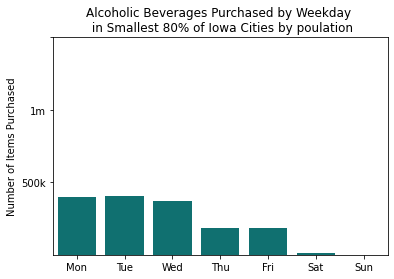

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.countplot(x='day', data=df[df['city'].isin(smallestcities)], order=labels, color='teal')
ax.set(xlabel='', ylabel='Number of Items Purchased', title='Alcoholic Beverages Purchased by Weekday \n in Smallest 80% of Iowa Cities by poulation')
ax.set_yticks([50000, 100000,150000])
ax.set_yticklabels(['500k','1m'])
plt.show(ax)
ax.get_figure().savefig("WeeklyBeveragePurchasesSmallest80.png")
files.download("WeeklyBeveragePurchasesSmallest80.png")



In [251]:
city_populations = dfp.set_index("city").population
city_counts = df.groupby(['city']).size()
combined_df = pd.DataFrame(data={"population": city_populations, "count": city_counts})
combined_df = combined_df.dropna()
percapita_sales = combined_df['count']/combined_df['population']
log_pop = combined_df['population'].apply(math.log10)



In [252]:
outliers = percapita_sales.nlargest(5)
percapita_sales = percapita_sales.drop(outliers.index)
log_pop =log_pop.drop(outliers.index)

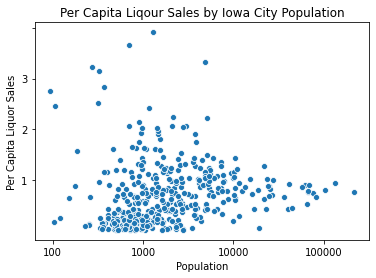

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [301]:


scatter = sns.scatterplot(x= logpop, y=percapita_sales, )
scatter.set_yticks([1, 2, 3, 4])
scatter.set_yticklabels(['1','2','3'])
xlabels = [10**n for n in range(2,6)] 
scatter.set_xticks(range(2,6))
scatter.set_xticklabels(xlabels)
scatter.set(xlabel='Population', ylabel='Per Capita Liquor Sales', title='Per Capita Liqour Sales by Iowa City Population')
plt.show(scatter)
scatter.get_figure().savefig("PerCapitaLiquorSales.png")
files.download("PerCapitaLiquorSales.png")


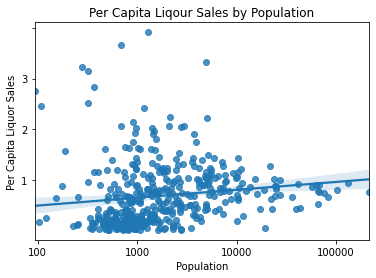

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [302]:
reg = sns.regplot(log_pop, percapita_sales)
reg.set_yticks([1, 2, 3, 4])
reg.set_yticklabels(['1','2','3'])
reg.set_xticks(range(2,6))
reg.set_xticklabels(xlabels)
reg.set(xlabel='Population', ylabel='Per Capita Liquor Sales', title='Per Capita Liqour Sales by Population')
plt.show(reg)
reg.get_figure().savefig("PerCapitaLiquorSalesFit.png")
files.download("PerCapitaLiquorSalesFit.png")